### PartialRankerReduced

Experiments with reducing the number of ranks computed by DFG based partial ranking methodology. In order to follow, please refer to Methodology 2 in the paper. 

#### Experiment 2

We refer to the measurement data from the previous section. Recall, **10 objects** are created, each with **3 measurement values** sampled from 2 different normal distributions that **are well-separated**.

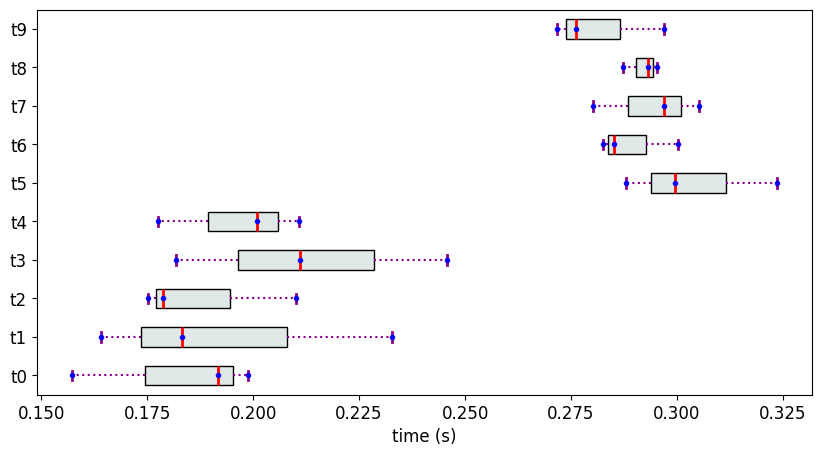

In [5]:
from partial_ranker import MeasurementsSimulator, MeasurementsVisualizer

n1 = [0.2, 0.02]
n2 = [0.3,0.02]
M4 = {}

for i in range(5):
    M4['t{}'.format(i)] = n1

for i in range(5,10):
    M4['t{}'.format(i)] = n2

ms = MeasurementsSimulator(M4,seed=2)
ms.measure(reps=3)
measurements = ms.get_measurements()

mv = MeasurementsVisualizer(measurements)
fig = mv.show_measurements_boxplots(scale=0.5)

**The Partial Ranks according to Methodology 2**

In [6]:
from partial_ranker import QuantileComparer, Method,PartialRanker

cm = QuantileComparer(measurements)
cm.compute_quantiles(q_max=75, q_min=25)
cm.compare()
pr = PartialRanker(cm)
pr.compute_ranks(Method.DFGReduced)
pr.get_ranks()

{0: ['t0', 't2', 't1', 't4', 't3'], 1: ['t9', 't6', 't7', 't8', 't5']}

Now, the objects are classified into ranks according to the original distributions.

#### Experiment 3

Methodology 2 does not compute the partial ranking with the minimum possible number of ranks. Consider the following measurement data, again sampled from 2 normal distributions with objects having 3 values each.

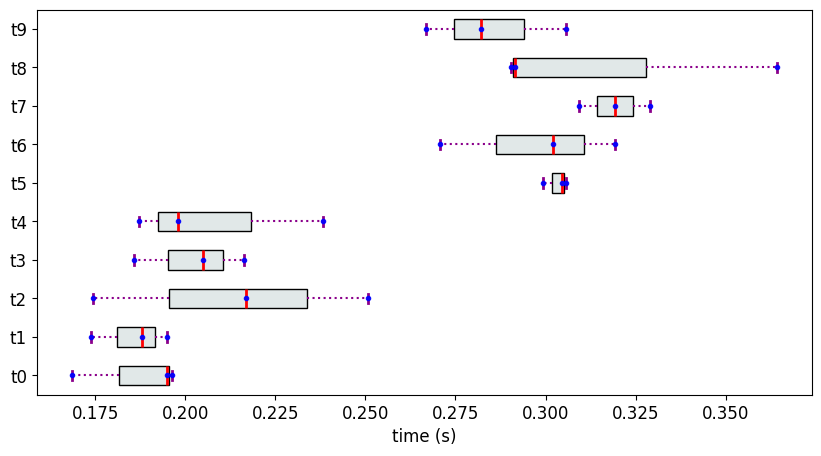

In [7]:

n1 = [0.2, 0.02]
n2 = [0.3,0.02]
M5 = {}

for i in range(5):
    M5['t{}'.format(i)] = n1

for i in range(5,10):
    M5['t{}'.format(i)] = n2
    
ms = MeasurementsSimulator(M5,seed=512)
ms.measure(reps=3)
measurements = ms.get_measurements()

mv = MeasurementsVisualizer(measurements)
fig = mv.show_measurements_boxplots(scale=0.5)

**The Partial Ranks according to Methodology 2**

In [8]:

cm = QuantileComparer(measurements)
cm.compute_quantiles(q_max=75, q_min=25)
cm.compare()
pr = PartialRanker(cm)
pr.compute_ranks(Method.DFGReduced)
pr.get_ranks()

{0: ['t1', 't0', 't3', 't4', 't2'], 1: ['t9', 't6', 't8', 't5'], 2: ['t7']}

In the following section, we show that **PartialRankerMin** can compute a partial ranking with two ranks, which is the minimum possible number of ranks for this case. **PartialRankerDFGReduced** is a trade off between **PartialRankerMin** and **PartialRankerDFG**, and particularly useful as a starting point,  when the number of measurements for the objects are not consistent and it is hard to make an assumption about the nature of the distributions. 